### Sampling and the central limit theorem

#### Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. 

Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. 

Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. 

The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. 

Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. 

Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
#for t-test
from scipy.stats import ttest_ind

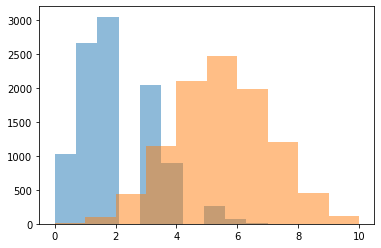

Sample mean 1: 1.95 
Sample mean 2: 5.13 
Standard Deviation 1: 1.122542208605543 
Standard Deviation 2: 1.460973800054075 


In [5]:
# create two binomially distributed populations with n equal to 10 and size equal to 10000.
# The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. 

# for population 2, the p value is large - what does that mean?
np.random.seed(111)

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1, alpha=0.5, label='Population 1') # I forgot what Alpha was for?
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.show()

# Using a sample size of 100, calculate the means and standard deviations of your samples.
sample1 = np.random.choice(pop1, 100, replace=True) # what does replace do?
sample2 = np.random.choice(pop2, 100, replace=True)

sample1_mean = sample1.mean()
sample2_mean = sample2.mean()

print('Sample mean 1: {} '.format(sample1_mean))
print('Sample mean 2: {} '.format(sample2_mean))

std1_sample1 = np.std(sample1, ddof=1)
std2_sample2 = np.std(sample2, ddof=1)

print('Standard Deviation 1: {} '.format(std1_sample1))
print('Standard Deviation 2: {} '.format(std2_sample2))


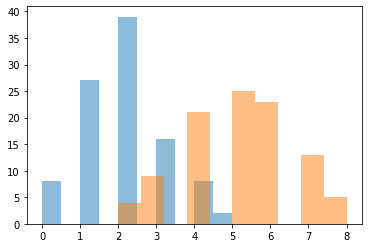

In [6]:
plt.hist(sample1, alpha=0.5, label='Sample 1') # I forgot what Alpha was for?
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.show()


In [7]:
# Increase the size of your samples from 100 to 1000, 
# then calculate the means and standard deviations for your new samples and 
# create histograms for each. 
np.random.seed(111)
sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)

sample3_mean = sample3.mean()
sample4_mean = sample4.mean()

print('Sample mean 3: {} '.format(sample3_mean))
print('Sample mean 4: {} '.format(sample4_mean))

std3_sample3 = np.std(sample3, ddof=1)
std4_sample4 = np.std(sample4, ddof=1)

print('Standard Deviation 3: {} '.format(std3_sample3))
print('Standard Deviation 4: {} '.format(std4_sample4))



Sample mean 3: 2.045 
Sample mean 4: 4.976 
Standard Deviation 3: 1.3048669195276879 
Standard Deviation 4: 1.5823804624450872 


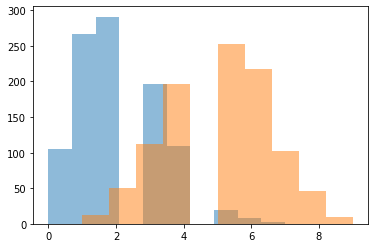

In [8]:
plt.hist(sample3, alpha=0.5, label='Sample 3') # I forgot what Alpha was for?
plt.hist(sample4, alpha=0.5, label='Sample 4')
plt.show()


In [9]:
# Repeat this again, decreasing the size of your samples to 20. 
# What values change, and what remain the same?
np.random.seed(111)
sample5 = np.random.choice(pop1, 20, replace=True)
sample6 = np.random.choice(pop2, 20, replace=True)

sample5_mean = sample5.mean()
sample6_mean = sample6.mean()

print('Sample mean 5: {} '.format(sample5_mean))
print('Sample mean 6: {} '.format(sample6_mean))

std5_sample5 = np.std(sample5, ddof=1)
std6_sample6 = np.std(sample6, ddof=1)

print('Standard Deviation 5: {} '.format(std5_sample5))
print('Standard Deviation 6: {} '.format(std6_sample6))

Sample mean 5: 1.9 
Sample mean 6: 4.65 
Standard Deviation 5: 1.4832396974191324 
Standard Deviation 6: 1.5312533566021216 


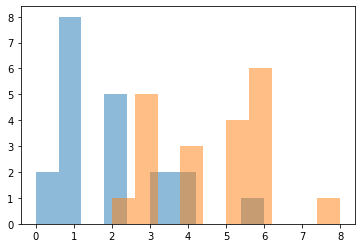

In [10]:
plt.hist(sample5, alpha=0.5, label='Sample 5') # I forgot what Alpha was for?
plt.hist(sample6, alpha=0.5, label='Sample 6')
plt.show()

In [11]:
# Change the probability value (p in the NumPy documentation) for pop1 to 0.3, 
# then take new samples and compute the t-statistic and p-value. 
np.random.seed(111)

pop3 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample7 = np.random.choice(pop3, 100, replace=True)
sample8 = np.random.choice(pop2, 100, replace=True)

sample7_mean = sample7.mean()
sample8_mean = sample8.mean()

print('Sample mean 7: {} '.format(sample7_mean))
print('Sample mean 8: {} '.format(sample8_mean))

std7_sample7 = np.std(sample7, ddof=1)
std8_sample8 = np.std(sample8, ddof=1)

print('Standard Deviation 7: {} '.format(std7_sample7))
print('Standard Deviation 8: {} '.format(std8_sample8))

# diff in mean
diff = sample8_mean - sample7_mean
#print(diff)

# std error
size = np.array([len(sample7), len(sample8)])
sd = np.array([std7_sample7, std8_sample8])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#print(diff_se)
print('Standard Error: {} '.format(diff/diff_se)) 


print(ttest_ind(sample7, sample8, equal_var=False))


Sample mean 7: 3.0 
Sample mean 8: 5.13 
Standard Deviation 7: 1.2949006435891817 
Standard Deviation 8: 1.460973800054075 
Standard Error: 10.91058514707485 
Ttest_indResult(statistic=-10.910585147074849, pvalue=6.0492088043625795e-22)


In [12]:
# Then change the probability value p for group 1 to 0.4, and do it again. 
# What changes, and why?

np.random.seed(111)

pop4 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample9 = np.random.choice(pop4, 100, replace=True)
sample8 = np.random.choice(pop2, 100, replace=True)

sample9_mean = sample9.mean()
sample8_mean = sample8.mean()


print('Sample mean 9: {} '.format(sample9_mean))
print('Sample mean 8: {} '.format(sample8_mean))

std9_sample9 = np.std(sample9, ddof=1)
std8_sample8 = np.std(sample8, ddof=1)

print('Standard Deviation 7: {} '.format(std9_sample9))
print('Standard Deviation 8: {} '.format(std8_sample8))

# diff in mean
diff = sample8_mean - sample9_mean
print(diff)

# std error
size = np.array([len(sample9), len(sample8)])
sd = np.array([std9_sample9, std8_sample8])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#print(diff_se)
print('Standard Error: {} '.format(diff/diff_se)) 


print(ttest_ind(sample9, sample8, equal_var=False))


Sample mean 9: 4.0 
Sample mean 8: 5.13 
Standard Deviation 7: 1.348399724926484 
Standard Deviation 8: 1.460973800054075 
1.13
Standard Error: 5.683757856447536 
Ttest_indResult(statistic=-5.6837578564475351, pvalue=4.7003765983678913e-08)


In [14]:
# Change the distribution of your populations from binomial to a distribution of your choice. 
# Do the sample mean values still accurately represent the population values?

mean = 0 
mean2 = 0.5
sd = 0.1
sd2 = 0.25
n = 10000

np.random.seed(111)

normalDist1 = np.random.normal(mean, sd, n)
normalDist2 = np.random.normal(mean2, sd2, n)

sample_normal_1 = np.random.choice(normalDist1, 100, replace=True)
sample_normal_2 = np.random.choice(normalDist2, 100, replace=True)

sample_normal1_mean = sample_normal_1.mean()
sample_normal2_mean = sample_normal_2.mean()


print('Sample mean normal1: {} '.format(sample_normal1_mean))
print('Sample mean normal2: {} '.format(sample_normal2_mean))

std_sample_normal1 = np.std(sample_normal_1, ddof=1)
std_sample_normal2 = np.std(sample_normal_2, ddof=1)

print('Standard Deviation normal 1: {} '.format(std_sample_normal1))
print('Standard Deviation normal 2: {} '.format(std8_sample_normal2))

# diff in mean
diff = sample8_mean - sample9_mean
print(diff)

# std error
size = np.array([len(sample_normal_1), len(sample_normal_2)])
sd = np.array([std_sample_normal1, std_sample_normal2])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#print(diff_se)
print('Standard Error: {} '.format(diff/diff_se)) 

print(ttest_ind(sample_normal_1, sample_normal_2, equal_var=False))


Sample mean normal1: 0.011160819052775252 
Sample mean normal2: 0.4991357840353903 
Standard Deviation normal 1: 0.095552022567131 
Standard Deviation normal 2: 0.24353384745726195 
1.13
Standard Error: 43.194341487260246 
Ttest_indResult(statistic=-18.652882543976048, pvalue=2.0620209762100722e-38)


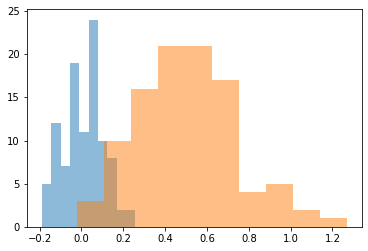

In [50]:
plt.hist(sample_normal_1, alpha=0.5, label='Sample 3') # I forgot what Alpha was for?
plt.hist(sample_normal_2, alpha=0.5, label='Sample 4')
plt.show()
